In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st 

In [2]:

companys = pd.read_csv('/datasets/project_sql_result_01.csv')
companys.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
companys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
top10_dropoff = dropoff.sort_values('average_trips', ascending= False).head(10)
top10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


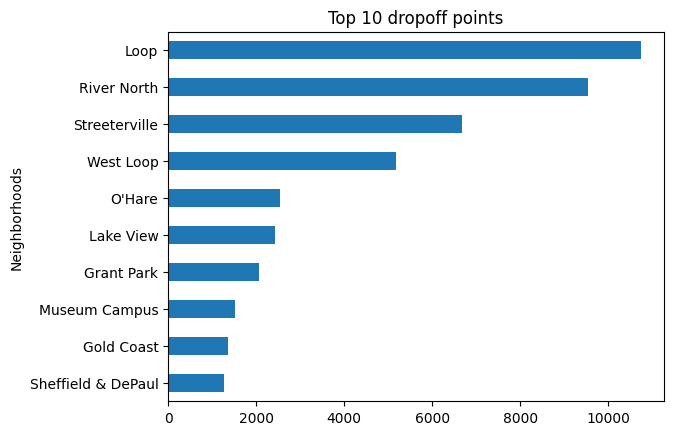

In [7]:

grafico_top10_dropoff = top10_dropoff.sort_values('average_trips')
grafico_top10_dropoff.plot(
    x = 'dropoff_location_name',
    y = 'average_trips',
    title = 'Top 10 dropoff points',
    xlabel = 'Neighborhoods',
    legend = False,
    kind = 'barh'
)
plt.show() 

**Top 10 dropoff points**

Tanto en Loop como River Northt y Streeterville se hacen gran cantidad de dropoffs, ya que estas son areas centricas de la ciudad y zonas turísticas por lo que las hace zonas muy concurridas. Aunque West Loop  ya no sea una zona tan centrica sigue estando cerca de estas zonas por lo que hace sentido que su cantidad de dropoffs siga siendo considerablemente alto al resto de los barrios. En cuanto al resto podemos asumir que son zonas más bien habitacionales que no tienen tánta concurrencia.


In [8]:
top10_companys = companys.sort_values('trips_amount', ascending= False).head(10)
top10_companys

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


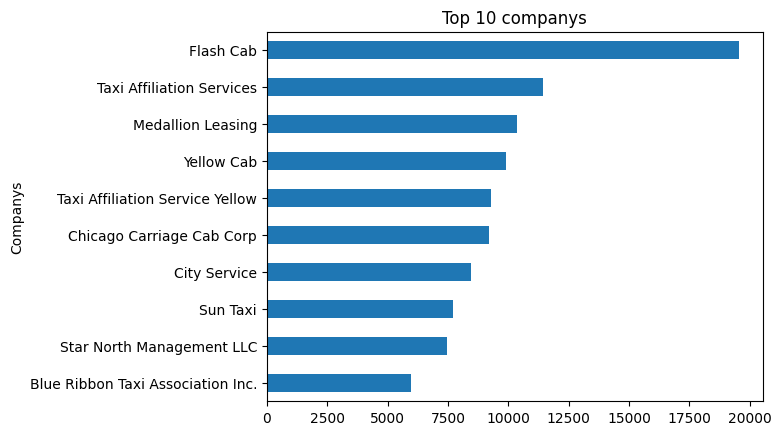

In [9]:
grafico_top10_companys = top10_companys.sort_values('trips_amount')
grafico_top10_companys.plot(
    x = 'company_name',
    y = 'trips_amount',
    title = 'Top 10 companys',
    xlabel = 'Companys',
    legend = False,
    kind = 'barh'
)
plt.show() 

**Top 10 companys**

Esta gráfica nos muestra claramente que Flash Cab es lider en el mercado en cuanto a número de viajes, aunque tendríamos que hacer un análisis más a fondo para sacar otro tipo de conclusiones.

In [10]:
loop_ohare =  pd.read_csv('/datasets/project_sql_result_07.csv')
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:


loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')
loop_ohare.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [13]:
loop_ohare['day_of_week'] = loop_ohare['start_ts'].dt.day_name()
loop_ohare

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


In [14]:

bad_saturdy = loop_ohare[(loop_ohare['day_of_week'] == 'Saturday') & (loop_ohare['weather_conditions'] == 'Bad')]

good_saturdy = loop_ohare[(loop_ohare['day_of_week'] == 'Saturday') & (loop_ohare['weather_conditions'] == 'Good')]

hipotesis = st.ttest_ind(bad_saturdy['duration_seconds'], good_saturdy['duration_seconds'], equal_var=False)

print('Valor p:', hipotesis.pvalue)

alpha = 0.05

if (hipotesis.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
    print("Conclusión: Existe una diferencia significativa en la duración media de los viajes los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula")
    print("Conclusión: No hay evidencia suficiente para afirmar que la duración media cambia los sábados lluviosos.")


Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula
Conclusión: Existe una diferencia significativa en la duración media de los viajes los sábados lluviosos.


**Conclusión final**

Existe evidencia estadísticamente significativa para afirmar que la duración promedio de los viajes desde el Loop hasta O’Hare sí cambia en los sábados lluviosos. Para la hipótesis se compararon específicamente los sábados lluviosos con los sábados no lluviosos, ya que el tráfico puede variar según el día de la semana sin importar el clima, y este factor podría afectar los resultados de la hipótesis. De esta manera, al controlar por el día de la semana, confirmamos que la diferencia observada se asocia al clima (lluvia) y no únicamente al patrón normal de tráfico de un sábado.